In [7]:
import sys 
sys.path.append('..')
from common.util import create_contexts_target, most_similar
from cbow import CBOW
from common.optimizer import Adam
from common.trainer import Trainer

In [2]:
window_size = 5
hidden_size = 100
batch_size = 100
max_epoch = 10

In [3]:
from dataset import ptb
corpus, word_to_id, id_to_word = ptb.load_data('train')
corpus = corpus[:1000]

In [4]:
vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)


In [5]:
model = CBOW(vocab_size, hidden_size, window_size, corpus)

| epoch 1 | iter 1 / 33 | time 0[s] | loss 4.16
| epoch 1 | iter 21 / 33 | time 0[s] | loss 4.16
| epoch 2 | iter 1 / 33 | time 0[s] | loss 4.16
| epoch 2 | iter 21 / 33 | time 0[s] | loss 4.15
| epoch 3 | iter 1 / 33 | time 0[s] | loss 4.13
| epoch 3 | iter 21 / 33 | time 0[s] | loss 4.08
| epoch 4 | iter 1 / 33 | time 0[s] | loss 4.00
| epoch 4 | iter 21 / 33 | time 0[s] | loss 3.90
| epoch 5 | iter 1 / 33 | time 0[s] | loss 3.78
| epoch 5 | iter 21 / 33 | time 0[s] | loss 3.65
| epoch 6 | iter 1 / 33 | time 1[s] | loss 3.51
| epoch 6 | iter 21 / 33 | time 1[s] | loss 3.39
| epoch 7 | iter 1 / 33 | time 1[s] | loss 3.27
| epoch 7 | iter 21 / 33 | time 1[s] | loss 3.17
| epoch 8 | iter 1 / 33 | time 1[s] | loss 3.10
| epoch 8 | iter 21 / 33 | time 1[s] | loss 3.02
| epoch 9 | iter 1 / 33 | time 1[s] | loss 2.96
| epoch 9 | iter 21 / 33 | time 1[s] | loss 2.92
| epoch 10 | iter 1 / 33 | time 1[s] | loss 2.87
| epoch 10 | iter 21 / 33 | time 1[s] | loss 2.83
| epoch 11 | iter 1 / 33 | t

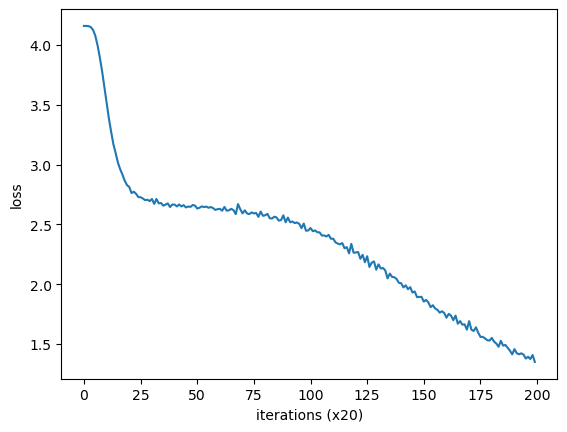

In [6]:
optimizer = Adam()
trainer = Trainer(model, optimizer)
trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

In [8]:
querys = ['you', 'year', 'car', 'toyota']
word_vecs = model.word_vecs
for query in querys:
    most_similar(query, word_to_id, id_to_word, word_vecs)


[query] you
hyundai: 0.9075361490249634
ford: 0.8768857717514038
pockets: 0.8646807670593262
business: 0.8540483713150024
eurodollar: 0.8530641198158264

[query] year
reruns: 0.8973470330238342
're: 0.8761104941368103
maturity: 0.8716666102409363
on-site: 0.8696205615997314
undercut: 0.8626641631126404

[query] car
downward: 0.9646137356758118
compound: 0.9042606353759766
function: 0.8872271776199341
christie: 0.870032012462616
on: 0.8651899695396423

[query] toyota
called: 0.8999717831611633
issue: 0.8867165446281433
fisher: 0.880207359790802
inception: 0.8787949085235596
regardless: 0.8495678305625916
